<a href="https://colab.research.google.com/github/AndriiFedorchuk/Andrii/blob/master/Main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main assumptions

The purpose of this project is to train the neural network, which, based on the hobby and the interests of the person, will guess its gender.

It is worth saying that the author of the project does NOT believe that certain interests and hobbies are inherent only in men or only women, just as he does not support the view that certain hobbies are pure "male" or "female".

The author also respects people's right to self-identification, including gender one. The division of people into two genders was chosen only due to the fact, that the corresponding division was in the data set from which the author took the main data.

The author of the project only believes that in 2020, there are still some factors that encourage people to choose their interests in such a way that there is a statistically significant difference between the interests of genders. These factors include, but are not limited to:
- traditional education
- the influence of people with traditional views
- society's expectation that a person will behave according to his or her gender role
- the effect of hormones (in particular testosterone stimulates interest in competitiveness and cruelty)
- etc.

Based on all of the above, the author believes that in 2020 it is impossible to guess the gender of a person with 100% accuracy, based only on its interests and hobbies, but thinks that it is quite possible to expect a guessing accuracy at the order of 70-85%.

# Data importing

To begin with, we import the basic tools and the main file. The file is in .swc format and was manually created by the author based on an open-source data set.

[https://www.kaggle.com/miroslavsabo/young-people-survey#columns.csv](https://www.kaggle.com/miroslavsabo/young-people-survey#columns.csv)

The number of parameters was reduced from 150 to 33, of which 32 are hobbies and interests of the person, and 1 - its gender.

In order to simplify my task I marked genders with numbers:
- 0 - male
- 1 - female

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


URL = 'https://raw.githubusercontent.com/AndriiFedorchuk/Andrii/master/main_fa.csv'    #import link of a dataset
dataset = pd.read_csv(URL)                                                             #I define a dataset as a corresponding .csv file
dataset.head(10)                                                                       #I ask to show first 10 raws of my .csv file

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,Countryside and outdoors,Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Gender
0,1,5,1,3,3,5,3,5,3,3,3,3,5,3,1,1,1,1,5,3,3,2,1,5,5,1,4,4,2,5,4,4,1
1,1,3,4,5,2,4,4,5,1,1,4,4,5,1,2,2,2,1,1,1,1,1,1,1,1,2,3,3,2,4,2,5,1
2,1,2,1,5,2,4,2,4,1,1,5,2,5,2,3,1,5,5,5,5,5,5,5,2,1,1,4,2,5,5,5,5,1
3,4,4,5,4,1,3,1,2,3,3,5,4,4,2,5,1,5,4,1,1,1,3,1,1,1,2,4,3,1,2,1,1,1
4,3,2,3,2,2,2,2,2,3,3,5,2,3,3,2,3,1,4,4,1,3,1,3,1,4,3,3,3,2,4,2,1,1
5,5,3,4,2,3,4,4,1,4,4,3,3,4,4,3,5,2,2,5,1,5,1,5,4,2,1,2,3,1,3,3,2,0
6,3,3,1,1,1,2,1,3,5,5,3,3,4,5,3,4,1,1,4,3,2,1,5,3,3,1,3,4,3,5,1,5,1
7,5,2,3,1,1,5,4,1,2,2,2,3,4,1,2,1,1,2,2,1,1,1,4,5,1,3,3,2,2,4,2,5,0
8,3,2,1,1,1,1,1,1,3,1,5,1,1,1,1,1,1,2,4,1,2,1,4,1,1,5,2,1,5,4,1,1,1
9,3,2,3,3,1,5,1,4,2,1,4,4,5,1,1,1,4,4,4,5,3,1,4,4,1,2,4,3,5,5,2,2,1


# Dividing the datasheet

Here I divided a dataset in two parts.

All interests and hobbies I marked as x (my input) and gender as y (my output).

Also, I divided all data into training data (80%) and testing data (20%).


In [35]:
x = dataset.iloc[:,:32].values
y = dataset.iloc[:,32].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# print info about a shape of arrays
print(x_train.shape, 'train samples for parameters')
print(y_train.shape, 'train samples for output - Gender')
print(x_test.shape, 'test samples  for parameters')
print(y_test.shape, 'test samples for output - Gender')

(800, 32) train samples for parameters
(800,) train samples for output - Gender
(200, 32) test samples  for parameters
(200,) test samples for output - Gender


(1000, 32)
(1000, 2)


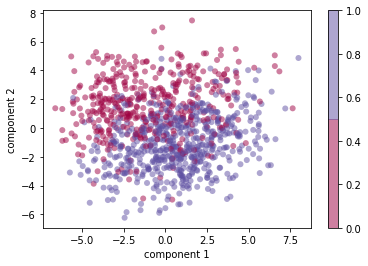

In [36]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(2) 
projected = pca.fit_transform(x)
print(x.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 2))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

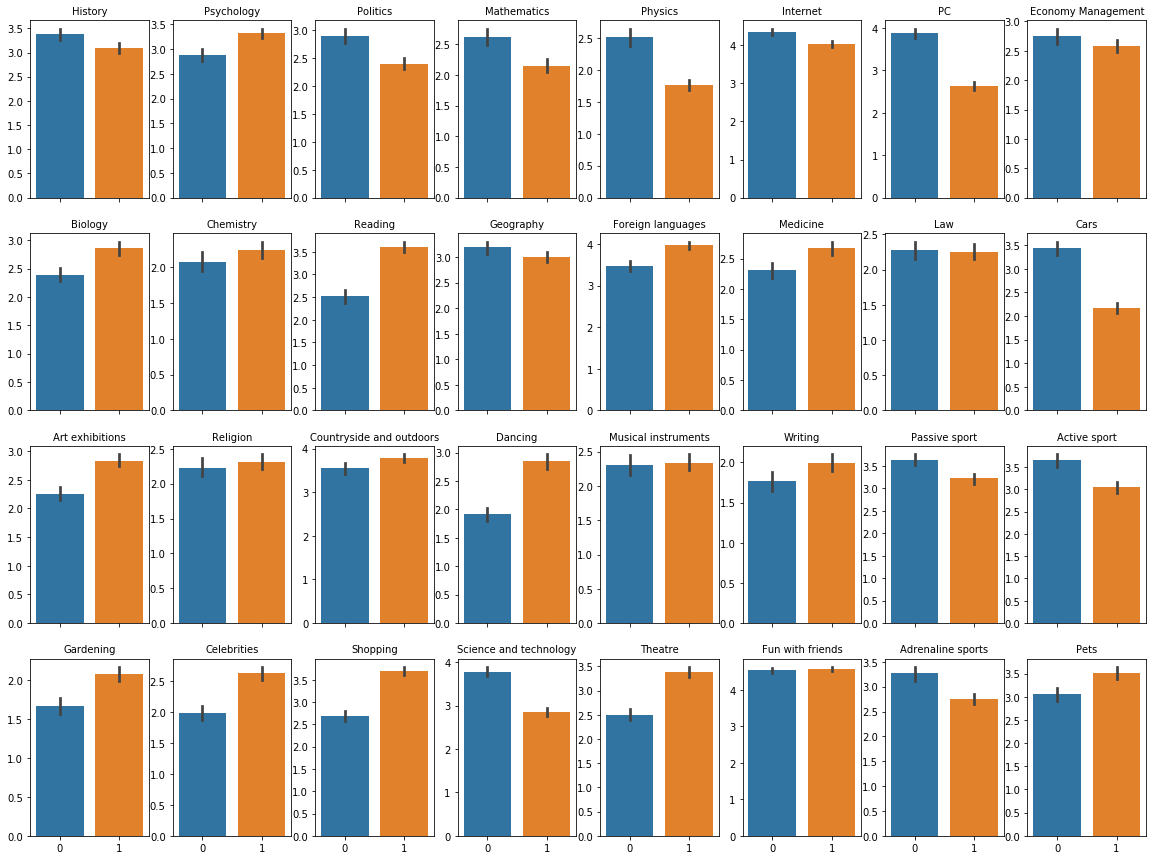

In [37]:
import seaborn as sns

good_columns = ['History',	'Psychology',	'Politics',	'Mathematics',	'Physics',
                'Internet',	'PC',	'Economy Management',	'Biology',	'Chemistry',
                'Reading',	'Geography',	'Foreign languages',	'Medicine',	'Law',
                'Cars',	'Art exhibitions',	'Religion',	'Countryside and outdoors',
                'Dancing',	'Musical instruments',	'Writing',	'Passive sport',
                'Active sport',	'Gardening',	'Celebrities',	'Shopping',
                'Science and technology',	'Theatre',	'Fun with friends',	'Adrenaline sports',	'Pets']

fig, ax = plt.subplots(nrows=4, ncols=8 ,figsize=(20,15), sharex=True)
start = 0
for j in range(4):
    for i in range(8):
        if start == len(good_columns):
            break
        sns.barplot(y=good_columns[start], x='Gender', data=dataset, ax=ax[j,i])
        ax[j,i].set_ylabel('')
        ax[j,i].set_xlabel('')
        ax[j,i].set_title(good_columns[start], fontsize=10)
        start += 1

In [38]:
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier


# train the model
clf = GaussianNB()
#clf = LinearDiscriminantAnalysis()
#clf = KNeighborsClassifier(5)
#clf =  MLPClassifier(alpha=0.05, max_iter=10000,solver='adam', random_state=1,
#                hidden_layer_sizes=[100, 100],early_stopping=True,
#                verbose=10, tol=0.00001)

print(clf.fit(x_train, y_train))
#print(clf.feature_importances_)  

# use the model to predict the labels of the test data
predicted = clf.predict(x_test)
expected = y_test


print("Score train = ",clf.score(x_train, y_train))
print("Score test  = ",clf.score(x_test, y_test))

from sklearn import metrics

print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))
plt.show()

GaussianNB(priors=None, var_smoothing=1e-09)
Score train =  0.8575
Score test  =  0.825
Confusion matrix:
[[ 64  21]
 [ 14 101]]


In [39]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

# Neural network
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(32,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 8)                 264       
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_19 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 18        
Total params: 498
Trainable params: 498
Non-trainable params: 0
_________________________________________________________________


In [40]:
batch_size = 100
num_classes = 2
epochs = 40

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))


Train on 800 samples, validate on 200 samples
Epoch 1/40
800/800 [==============================] - 1s 648us/step - loss: 1.0560 - acc: 0.5937 - val_loss: 0.7976 - val_acc: 0.5850
Epoch 2/40
800/800 [==============================] - 0s 26us/step - loss: 0.7265 - acc: 0.5775 - val_loss: 0.6417 - val_acc: 0.5900
Epoch 3/40
800/800 [==============================] - 0s 28us/step - loss: 0.6591 - acc: 0.5513 - val_loss: 0.6489 - val_acc: 0.6150
Epoch 4/40
800/800 [==============================] - 0s 26us/step - loss: 0.6518 - acc: 0.5588 - val_loss: 0.6213 - val_acc: 0.6400
Epoch 5/40
800/800 [==============================] - 0s 27us/step - loss: 0.6210 - acc: 0.6300 - val_loss: 0.5700 - val_acc: 0.6950
Epoch 6/40
800/800 [==============================] - 0s 24us/step - loss: 0.5869 - acc: 0.6812 - val_loss: 0.5439 - val_acc: 0.7300
Epoch 7/40
800/800 [==============================] - 0s 25us/step - loss: 0.5613 - acc: 0.7225 - val_loss: 0.5228 - val_acc: 0.7600
Epoch 8/40
800/800 [==

Score train =  0.8575
Score test  =  0.825
 
Confusion matrix:
[[ 64  21]
 [ 14 101]]
 


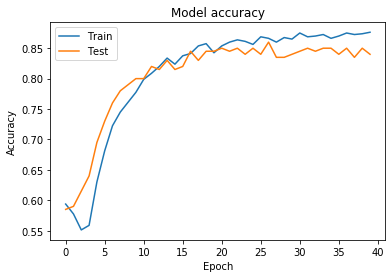

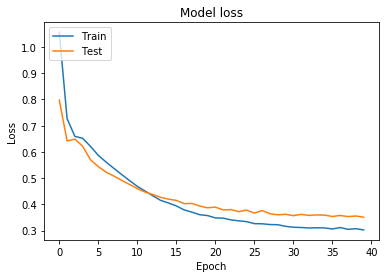

In [41]:
import matplotlib.pyplot as plt

print("Score train = ",clf.score(x_train, y_train))
print("Score test  = ",clf.score(x_test, y_test))
print(' ')
print('Confusion matrix:')
print(metrics.confusion_matrix(expected, predicted))
plt.show()
print(' ')

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()